<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-modules" data-toc-modified-id="Import-modules-1">Import modules</a></span></li><li><span><a href="#Get-variant-count-by-allele-frequency-bin" data-toc-modified-id="Get-variant-count-by-allele-frequency-bin-2">Get variant count by allele frequency bin</a></span><ul class="toc-item"><li><span><a href="#Counts-for-AF-bins:-0.1%---1%-and->1.0%" data-toc-modified-id="Counts-for-AF-bins:-0.1%---1%-and->1.0%-2.1">Counts for AF bins: <em>0.1% - 1%</em> and <em>&gt;1.0%</em></a></span></li><li><span><a href="#Counts-for-singletons,-doubletons,-and-AF-bins:-doubletons---0.05%,-0.05%---0.1%,-0.1%---1%,-and->1%" data-toc-modified-id="Counts-for-singletons,-doubletons,-and-AF-bins:-doubletons---0.05%,-0.05%---0.1%,-0.1%---1%,-and->1%-2.2">Counts for <em>singletons</em>, <em>doubletons</em>, and AF bins: <em>doubletons - 0.05%</em>, <em>0.05% - 0.1%</em>, <em>0.1% - 1%</em>, and <em>&gt;1%</em></a></span><ul class="toc-item"><li><span><a href="#All-DRD2-variants" data-toc-modified-id="All-DRD2-variants-2.2.1">All DRD2 variants</a></span></li><li><span><a href="#All-DRD2-coding-variants" data-toc-modified-id="All-DRD2-coding-variants-2.2.2">All DRD2 coding variants</a></span></li></ul></li></ul></li><li><span><a href="#Get-the-pLoF-variants-that-we-used-to-compute-constraint-metrics" data-toc-modified-id="Get-the-pLoF-variants-that-we-used-to-compute-constraint-metrics-3">Get the pLoF variants that we used to compute constraint metrics</a></span></li></ul></div>

## Import modules

In [1]:
import hail as hl

from gnomad_toolbox.analysis.general import get_variant_count_by_freq_bin
from gnomad_toolbox.filtering.variant import filter_by_intervals
from gnomad_toolbox.filtering.vep import filter_by_consequence_category
from gnomad_toolbox.filtering.constraint import get_observed_plofs_for_gene_constraint
from gnomad_toolbox.load_data import get_gnomad_release

Loading BokehJS ...

In [2]:
hl.init(backend="local")

Welcome to
     __  __     <>__
    / /_/ /__  __/ /
   / __  / _ `/ / /
  /_/ /_/\_,_/_/_/   version 0.2.132-678e1f52b999
LOGGING: writing to /Users/heqin/PycharmProjects/gnomad-toolbox/gnomad_toolbox/notebooks/hail-20250115-1729-0.2.132-678e1f52b999.log


## Get variant count by allele frequency bin

The examples below show variant counts using the Table filtered to DRD2.

### Counts for AF bins: *0.1% - 1%* and *>1.0%*

In [3]:
drd_interval_ht = filter_by_intervals("chr11:113409605-113475691")
af_bin_ht = get_variant_count_by_freq_bin(ht=drd_interval_ht)
print(af_bin_ht)

{'0.1% - 1.0%': 49, '>1.0%': 28, 'AC0 - 0.1%': 2662}


### Counts for *singletons*, *doubletons*, and AF bins: *doubletons - 0.05%*, *0.05% - 0.1%*, *0.1% - 1%*, and *>1%*

#### All DRD2 variants

In [4]:
af_bin_ht = get_variant_count_by_freq_bin(
    af_cutoffs=[0.0005, 0.001, 0.01], 
    singletons=True, 
    doubletons=True, 
    ht=drd_interval_ht,
)
print(af_bin_ht)

{'0.05% - 0.1%': 11, '0.1% - 1.0%': 34, '>1.0%': 26, 'doubletons': 384, 'doubletons - 0.05%': 894, 'singletons': 1390}


#### All DRD2 coding variants

In [5]:
af_bin_ht = get_variant_count_by_freq_bin(
    af_cutoffs=[0.0005, 0.001, 0.01], 
    singletons=True, 
    doubletons=True, 
    ht=filter_by_consequence_category(['coding'], ht=drd_interval_ht),
)
print(af_bin_ht)

{'doubletons': 5, 'doubletons - 0.05%': 3, 'singletons': 9}


## Get the pLoF variants that we used to compute constraint metrics

The pLOF variant count displayed on the browser meets the following requirements:

        - PASS variant QC
        - SNV
        - Allele frequency ≤ 0.1%
        - High-confidence LOFTEE in the MANE Select or Canonical transcript
        - ≥ a specified coverage threshold (depends on the version)

**Note: this number should match the number of observed pLOF SNVs on the gene page of gnomAD Browser.**

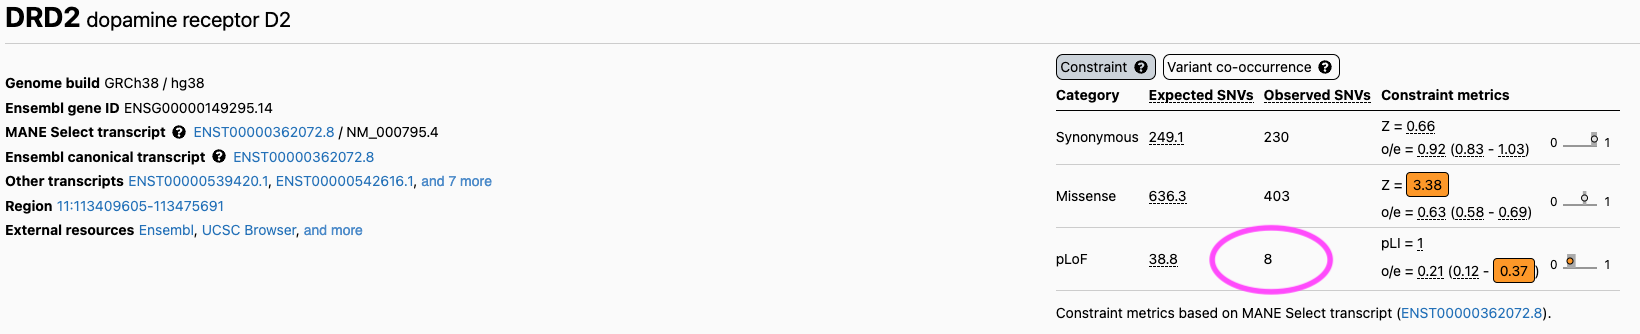

In [6]:
get_observed_plofs_for_gene_constraint('drd2').show(-1)

INFO (gnomad.utils.vep 953): Filtering to canonical transcripts
INFO (gnomad.utils.vep 959): Filtering to Ensembl transcripts...
INFO (gnomad.utils.vep 965): Filtering to consequences with LOFTEE labels: ['HC']...
INFO (gnomad.utils.vep 973): Filtering to genes of interest...


+-----------------+------------+
| locus           | alleles    |
+-----------------+------------+
| locus<GRCh38>   | array<str> |
+-----------------+------------+
| chr11:113412554 | ["A","G"]  |
| chr11:113412865 | ["G","A"]  |
| chr11:113412885 | ["T","C"]  |
| chr11:113414463 | ["T","G"]  |
| chr11:113415420 | ["C","G"]  |
| chr11:113415480 | ["G","A"]  |
| chr11:113416861 | ["A","G"]  |
| chr11:113424628 | ["C","T"]  |
+-----------------+------------+

+------------------------------------------------------------------------------+
| freq                                                                         |
+------------------------------------------------------------------------------+
| array<struct{AC: int32, AF: float64, AN: int32, homozygote_count: int64}>    |
+------------------------------------------------------------------------------+
| [(1,6.85e-07,1459578,0),(1,6.84e-07,1461894,0),(0,0.00e+00,33480,0),(0,0.... |
| [(1,6.85e-07,1459642,0),(1,6.84e-07,1461894,0),(0,0.00e+00,33422,0),(0,0.... |
| [(1,6.86e-07,1458160,0),(2,1.37e-06,1461894,0),(0,0.00e+00,33408,0),(0,0.... |
| [(3,2.05e-06,1461878,0),(3,2.05e-06,1461894,0),(0,0.00e+00,33480,0),(0,0.... |
| [(1,6.85e-07,1459072,0),(1,6.84e-07,1461894,0),(0,0.00e+00,33442,0),(0,0.... |
| [(2,1.37e-06,1461866,0),(2,1.37e-06,1461894,0),(0,0.00e+00,33480,0),(0,0.... |
| [(1,6.84e-07,1461444,0),(1,6.84e-07,1461894,0),(0,0.00e+00,33468,0),(0,0.... |
| [(1,6.84e-07,1461858,0),(1,6.84e-07,1461894,0),(0,0.00e+00,33480,0),(0,0.... |
+------------------------------------------------------------------------------+

+------------------+------------------+------------------+
| grpmax.gnomad.AC | grpmax.gnomad.AF | grpmax.gnomad.AN |
+------------------+------------------+------------------+
|            int32 |          float64 |            int32 |
+------------------+------------------+------------------+
|                1 |         8.99e-07 |          1111998 |
|                1 |         8.99e-07 |          1111812 |
|                1 |         9.00e-07 |          1111636 |
|                3 |         2.70e-06 |          1111998 |
|                1 |         1.16e-05 |            85890 |
|                2 |         1.80e-06 |          1111994 |
|                1 |         8.99e-07 |          1111804 |
|                1 |         8.99e-07 |          1112012 |
+------------------+------------------+------------------+

+--------------------------------+-----------------------+-------------------+
| grpmax.gnomad.homozygote_count | grpmax.gnomad.gen_anc | grpmax.non_ukb.AC |
+--------------------------------+-----------------------+-------------------+
|                          int64 | str                   |             int32 |
+--------------------------------+-----------------------+-------------------+
|                              0 | "nfe"                 |                NA |
|                              0 | "nfe"                 |                NA |
|                              0 | "nfe"                 |                NA |
|                              0 | "nfe"                 |                NA |
|                              0 | "sas"                 |                 1 |
|                              0 | "nfe"                 |                NA |
|                              0 | "nfe"                 |                 1 |
|                              0 | "nfe"                 |                NA |
+--------------------------------+-----------------------+-------------------+

+-------------------+-------------------+---------------------------------+
| grpmax.non_ukb.AF | grpmax.non_ukb.AN | grpmax.non_ukb.homozygote_count |
+-------------------+-------------------+---------------------------------+
|           float64 |             int32 |                           int64 |
+-------------------+-------------------+---------------------------------+
|                NA |                NA |                              NA |
|           